# big five personality

<img src="big_five.png">

Esta practica consiste en la limpieza del dataset big-five-personality-test contenido en  https://www.kaggle.com/tunguz/big-five-personality-test

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

### Exploración de los datos 

In [2]:
df = pd.read_csv("data-final.csv",sep='\t')
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
#tamaño y tipos de datos del dataset
print(df.shape)
print(df.dtypes)

(1015341, 110)
EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object


In [4]:
#Seleccionar columnas numericas
df_numerico = df.select_dtypes(include = [np.number])
columnas_numericas = df_numerico.columns.values
print(columnas_numericas)

['EXT1' 'EXT2' 'EXT3' 'EXT4' 'EXT5' 'EXT6' 'EXT7' 'EXT8' 'EXT9' 'EXT10'
 'EST1' 'EST2' 'EST3' 'EST4' 'EST5' 'EST6' 'EST7' 'EST8' 'EST9' 'EST10'
 'AGR1' 'AGR2' 'AGR3' 'AGR4' 'AGR5' 'AGR6' 'AGR7' 'AGR8' 'AGR9' 'AGR10'
 'CSN1' 'CSN2' 'CSN3' 'CSN4' 'CSN5' 'CSN6' 'CSN7' 'CSN8' 'CSN9' 'CSN10'
 'OPN1' 'OPN2' 'OPN3' 'OPN4' 'OPN5' 'OPN6' 'OPN7' 'OPN8' 'OPN9' 'OPN10'
 'EXT1_E' 'EXT2_E' 'EXT3_E' 'EXT4_E' 'EXT5_E' 'EXT6_E' 'EXT7_E' 'EXT8_E'
 'EXT9_E' 'EXT10_E' 'EST1_E' 'EST2_E' 'EST3_E' 'EST4_E' 'EST5_E' 'EST6_E'
 'EST7_E' 'EST8_E' 'EST9_E' 'EST10_E' 'AGR1_E' 'AGR2_E' 'AGR3_E' 'AGR4_E'
 'AGR5_E' 'AGR6_E' 'AGR7_E' 'AGR8_E' 'AGR9_E' 'AGR10_E' 'CSN1_E' 'CSN2_E'
 'CSN3_E' 'CSN4_E' 'CSN5_E' 'CSN6_E' 'CSN7_E' 'CSN8_E' 'CSN9_E' 'CSN10_E'
 'OPN1_E' 'OPN2_E' 'OPN3_E' 'OPN4_E' 'OPN5_E' 'OPN6_E' 'OPN7_E' 'OPN8_E'
 'OPN9_E' 'OPN10_E' 'screenw' 'screenh' 'introelapse' 'testelapse'
 'endelapse' 'IPC']


In [5]:
# seleccionar columnas no numericas
df_no_numerico = df.select_dtypes(exclude=[np.number])
columnas_no_numericas = df_no_numerico.columns.values
print(columnas_no_numericas)

['dateload' 'country' 'lat_appx_lots_of_err' 'long_appx_lots_of_err']


Se revisó que el conjunto de datos tiene 1,015,341 observaciones y 110 características, tambien se identificaron las caracteristicas numericas o categoricas ahora podemos revisar los datos, para poder identificar mejor las variables podemos observar que:

EXT - Questions to measure Extroversion

AGR - Questions to measure Agreeableness

CSN - Questions to measure Conscientiousness

EST - Questions to measure Neuroticism

OPN - Questions to measure Openness to Experience

y si terminan es _E es por el tiempo que se tomaron contestado la pregunta

#### Tecnica #1: Mapa de calor de los datos faltantes 

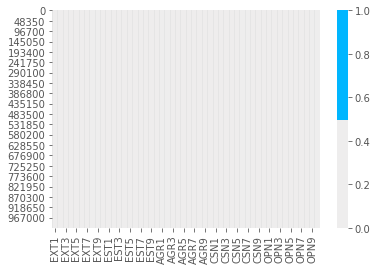

In [6]:
cols = df.columns[:50]
colours = ['#EEEDED', '#00B6FF']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#### Tecnica #2: Lista de porcentaje de datos faltantes 

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if (pct_missing > 0):
        print('{} - {}%'.format(col, round(pct_missing*100,2)))

EXT1 - 0.18%
EXT2 - 0.18%
EXT3 - 0.18%
EXT4 - 0.18%
EXT5 - 0.18%
EXT6 - 0.18%
EXT7 - 0.18%
EXT8 - 0.18%
EXT9 - 0.18%
EXT10 - 0.18%
EST1 - 0.18%
EST2 - 0.18%
EST3 - 0.18%
EST4 - 0.18%
EST5 - 0.18%
EST6 - 0.18%
EST7 - 0.18%
EST8 - 0.18%
EST9 - 0.18%
EST10 - 0.18%
AGR1 - 0.18%
AGR2 - 0.18%
AGR3 - 0.18%
AGR4 - 0.18%
AGR5 - 0.18%
AGR6 - 0.18%
AGR7 - 0.18%
AGR8 - 0.18%
AGR9 - 0.18%
AGR10 - 0.18%
CSN1 - 0.18%
CSN2 - 0.18%
CSN3 - 0.18%
CSN4 - 0.18%
CSN5 - 0.18%
CSN6 - 0.18%
CSN7 - 0.18%
CSN8 - 0.18%
CSN9 - 0.18%
CSN10 - 0.18%
OPN1 - 0.18%
OPN2 - 0.18%
OPN3 - 0.18%
OPN4 - 0.18%
OPN5 - 0.18%
OPN6 - 0.18%
OPN7 - 0.18%
OPN8 - 0.18%
OPN9 - 0.18%
OPN10 - 0.18%
EXT1_E - 0.18%
EXT2_E - 0.18%
EXT3_E - 0.18%
EXT4_E - 0.18%
EXT5_E - 0.18%
EXT6_E - 0.18%
EXT7_E - 0.18%
EXT8_E - 0.18%
EXT9_E - 0.18%
EXT10_E - 0.18%
EST1_E - 0.18%
EST2_E - 0.18%
EST3_E - 0.18%
EST4_E - 0.18%
EST5_E - 0.18%
EST6_E - 0.18%
EST7_E - 0.18%
EST8_E - 0.18%
EST9_E - 0.18%
EST10_E - 0.18%
AGR1_E - 0.18%
AGR2_E - 0.18%
AGR3_E - 0.18

Como podemos observar la mayoria de las caracteristicas presenta un 0.18% de datos faltantes siendo introelapse,screenW,screenh las categorias con mas faltantes siendo tan solo el 0.2%

#### Tecnica #3: Histograma de datos faltantes 

In [9]:
aux = df.copy()

created missing indicator for: EXT1
created missing indicator for: EXT2
created missing indicator for: EXT3
created missing indicator for: EXT4
created missing indicator for: EXT5
created missing indicator for: EXT6
created missing indicator for: EXT7
created missing indicator for: EXT8
created missing indicator for: EXT9
created missing indicator for: EXT10
created missing indicator for: EST1
created missing indicator for: EST2
created missing indicator for: EST3
created missing indicator for: EST4
created missing indicator for: EST5
created missing indicator for: EST6
created missing indicator for: EST7
created missing indicator for: EST8
created missing indicator for: EST9
created missing indicator for: EST10
created missing indicator for: AGR1
created missing indicator for: AGR2
created missing indicator for: AGR3
created missing indicator for: AGR4
created missing indicator for: AGR5
created missing indicator for: AGR6
created missing indicator for: AGR7
created missing indicator 

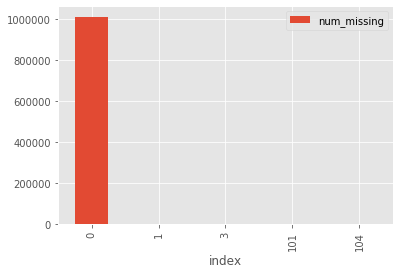

In [19]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        aux['{}_ismissing'.format(col)] = missing
        
# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in aux.columns if 'ismissing' in col]
aux['num_missing'] = aux[ismissing_cols].sum(axis=1)

aux['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [20]:
aux['num_missing'].value_counts()

0      1012050
3         1431
101       1148
104        635
1           77
Name: num_missing, dtype: int64

Aun que para este histograma no se puede observar muy bien podemos identificar que 1,012,050 no contienen valores perdidos, 77 tienen un valor perdido, 1431 observaciones 3, 1148 observaciones 101 y 635 104

### Analisis de las caracteristicas

#### Técnica #1: Histograma y Box Plot 

Cuando una característica es numerica se puede utilizar el histograma y el Box Plot para analizar la caracteristica

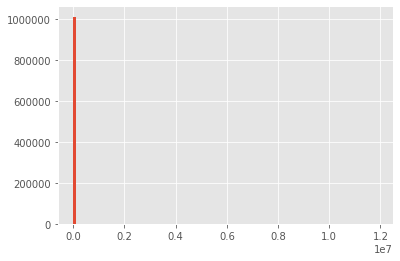

In [12]:
df['testelapse'].hist(bins=100)

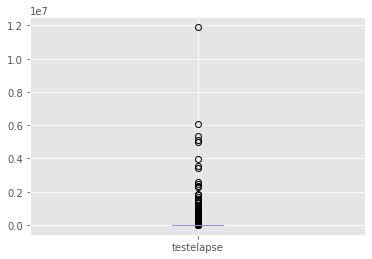

In [13]:
df.boxplot(column=['testelapse'])

#### Técnica #2: Estadistica descriptiva 

In [14]:
df['testelapse'].describe()

count    1.013558e+06
mean     6.754233e+02
std      2.017864e+04
min      1.000000e+00
25%      1.710000e+02
50%      2.240000e+02
75%      3.130000e+02
max      1.189272e+07
Name: testelapse, dtype: float64

#### Técnica #3: Gráfico de barras 

Cuando la característica es categórica podemos usar un gráfico de barras para aprender sobre sus categorías y distribución

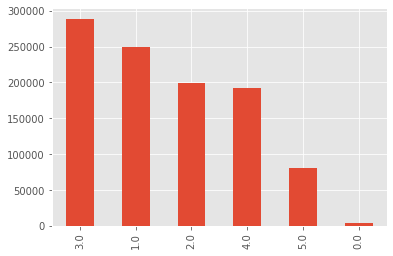

In [15]:
df['EXT1'].value_counts().plot.bar()

### Datos innecesarios 

#### Tipo innecesario #1: Desinformativo / Repetitivo 

In [25]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

#### Tipo innecesario #2:Irrelevante

En este tipo de datos innecesario depende del problema que estamos tratando de resolver para decidir si una caracteristica es irrelevante o no

#### Tipo innecesario #3: Duplicados 

En este dataset no cuenta con un indentificador para cada observación y se permite que pueda haber más de dos observaciones iguales

### Datos inconsistentes 

#### Tipo inconsistente #1: Capitalización  

El uso inconsistente de las mayúsculas y minúsculas en los valores categóricos es un error común. Podría causar problemas ya que los análisis en Python son sensibles a las mayúsculas y minúsculas, pero el dataset no contiene caracteristicas que puedan presentar este tipo de incostencias

#### Tipo inconsitente #2: Formatos

Otra estandarización que debemos realizar es la de los formatos de datos. Un ejemplo es convertir la característica dateload al formato DateTime

In [43]:
df[['dateload']].dtypes

dateload    object
dtype: object

In [44]:
df.dateload.value_counts()

2018-09-07 08:58:05    9
2018-09-07 05:25:34    8
2018-04-02 15:22:44    8
2018-09-13 20:40:14    8
2018-09-04 08:27:27    7
                      ..
2018-06-19 12:32:40    1
2017-08-01 04:18:13    1
2016-03-23 08:21:24    1
2016-05-04 09:43:51    1
2016-03-08 07:03:46    1
Name: dateload, Length: 1000680, dtype: int64

In [50]:
df['dateload'] = pd.to_datetime(df['dateload'],format='%Y-%m-%d')

In [51]:
df.dateload.value_counts()

2016-05-24    5545
2016-05-25    4355
2016-04-08    4186
2016-12-12    3760
2018-09-17    3513
              ... 
2017-01-01     315
2017-10-07     305
2017-10-21     282
2017-10-14     277
2016-12-31     268
Name: dateload, Length: 981, dtype: int64

#### Tipo inconsistente #3: Valores categoricos 

Una característica categórica tiene un número limitado de valores (símbolos). A veces puede haber otros valores debido a razones como los errores tipográficos, pero el dataset no contiene caracteristicas que puedan presentar este tipo de incostencias

####  Tipo inconsistente #4: Direcciones

La característica de la dirección podría ser un dolor de cabeza para muchos de nosotros. Porque la gente que introduce los datos en la base de datos a menudo no sigue un formato estándar,pero el dataset no contiene caracteristicas que puedan presentar este tipo de incostencias